In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
Data = pd.read_csv("./Datasets/banknote/data_banknote_authentication.csv")

In [11]:
Data = Data.to_numpy()

In [12]:
Data.shape

(1372, 5)

In [15]:
Data[0:10]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699,  0.     ],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ,  0.     ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645,  0.     ],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ,  0.     ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ,  0.     ],
       [ 4.3684 ,  9.6718 , -3.9606 , -3.1625 ,  0.     ],
       [ 3.5912 ,  3.0129 ,  0.72888,  0.56421,  0.     ],
       [ 2.0922 , -6.81   ,  8.4636 , -0.60216,  0.     ],
       [ 3.2032 ,  5.7588 , -0.75345, -0.61251,  0.     ],
       [ 1.5356 ,  9.1772 , -2.2718 , -0.73535,  0.     ]])

In [16]:
m, n = Data.shape
n0 = n-1 #number of input features

In [17]:
#randomly shuffling data because dataset is divided in two halves according to labels
randseq = np.random.permutation(m)
Data = Data[randseq[0:m], 0:n]

In [18]:
import math
train_num = math.floor(m*0.8)
test_num = m - train_num 

In [48]:
x_train = Data[0:train_num, 0:n0]
y_train = Data[0:train_num, n0]

x_test = Data[train_num+1:m, 0:n0]
y_test = Data[train_num+1:m, n0]

In [20]:
def sigmoid(x):
    sig = 1/(1+ np.exp(-x))
    return sig

In [21]:
L = 4
neurons = np.array([n0, 5, 5, 1]) #number of layers = number of input features

W1 = np.random.randn(neurons[1], neurons[0])
b1 = np.random.randn(neurons[1], 1)

W2 = np.random.randn(neurons[2], neurons[1])
b2 = np.random.randn(neurons[2], 1)

W3 = np.random.randn(neurons[3], neurons[2])
b3 = np.random.randn(neurons[3], 1)

In [22]:
#Hyper params
learning_rate = 0.01

iterations = 2000

#initializing matrices
Z1 = np.zeros([neurons[1], train_num])
A1 = np.zeros([neurons[1], train_num])

Z2 = np.zeros([neurons[2], train_num])
A2 = np.zeros([neurons[2], train_num])

Z3 = np.zeros([neurons[3], train_num])
A3 = np.zeros([neurons[3], train_num])

In [41]:
train_loss = np.zeros((iterations, 1))
train_accuracy = np.zeros((iterations, 1))

for i in range(iterations):
    #Forward prop
    Z1 = np.dot(W1, x_train.T) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    #computing metrics
    pred_train = A3 > 0.5
    train_accuracy[i] = 1 - np.sum(abs(pred_train - y_train))/train_num

    train_loss[i] = (-1/train_num) * np.sum(y_train * np.log(A3) + (1-y_train)*np.log(1-A3))

    print(f"Iteration : {i+1}, Loss : {train_loss[i]}, Accuracy : {train_accuracy}")

    #Back prop
    dZ3 = A3 - y_train
    dW3 = (1/train_num)* np.dot(dZ3, A2.T)
    db3 = (1/train_num)* np.sum(dZ3, axis = 1, keepdims= True)

    dA2 = A2*(1-A2)
    dZ2 = np.dot(W3.T, dZ3)*dA2
    dW2 = (1/train_num)* np.dot(dZ2, A1.T)
    db2 = (1/train_num)* np.sum(dZ2, axis = 1, keepdims= True)

    dA1 = A1*(1-A1)
    dZ1 = np.dot(W2.T, dZ2)*dA1
    dW1 = (1/train_num)* np.dot(dZ1, x_train)
    db1 = (1/train_num)* np.sum(dZ1, axis = 1, keepdims= True)

    W1 = W1 - learning_rate*dW1 
    b1 = b1 - learning_rate*db1

    W2 = W2 - learning_rate*dW2 
    b2 = b2 - learning_rate*db2

    W3 = W3 - learning_rate*dW3 
    b3 = b3 - learning_rate*db3

Iteration : 1, Loss : [0.52782375], Accuracy : [[0.82224248]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
Iteration : 2, Loss : [0.52768833], Accuracy : [[0.82224248]
 [0.82224248]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
Iteration : 3, Loss : [0.52755293], Accuracy : [[0.82224248]
 [0.82224248]
 [0.8213309 ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
Iteration : 4, Loss : [0.52741755], Accuracy : [[0.82224248]
 [0.82224248]
 [0.8213309 ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
Iteration : 5, Loss : [0.52728219], Accuracy : [[0.82224248]
 [0.82224248]
 [0.8213309 ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
Iteration : 6, Loss : [0.52714685], Accuracy : [[0.82224248]
 [0.82224248]
 [0.8213309 ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
Iteration : 7, Loss : [0.52701153], Accuracy : [[0.82224248]
 [0.82224248]
 [0.8213309 ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]
Iteration : 8, Loss : [0.52687623], Accur

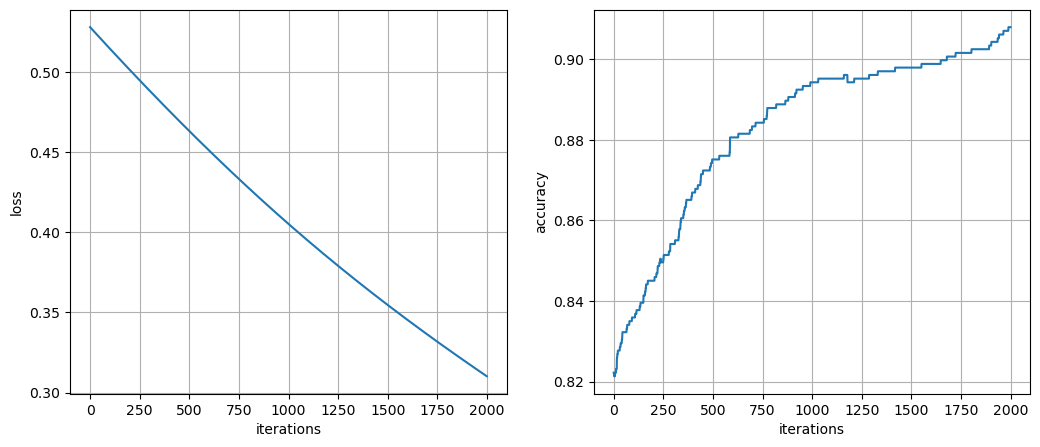

In [44]:
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.grid(True)
plt.xlabel('iterations')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracy)
plt.grid(True)
plt.xlabel('iterations')
plt.ylabel('accuracy')

plt.subplots_adjust(left = 0, 
                    bottom=0.1,
                    right = 1.5, 
                    top = 0.9,
                    wspace=0.2,
                    hspace=0.2)
plt.show()

In [53]:
#Forward prop
test_loss = np.zeros((iterations, 1))
test_accuracy = np.zeros((iterations, 1))
Z1 = np.dot(W1, x_test.T) + b1
A1 = sigmoid(Z1)

Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

Z3 = np.dot(W3, A2) + b3
A3 = sigmoid(Z3)

    #computing metrics
pred_test = A3 > 0.5
test_accuracy[i] = 1 - np.sum(abs(pred_test - y_test))/test_num

test_loss[i] = (-1/test_num) * np.sum(y_test * np.log(A3) + (1-y_test)*np.log(1-A3))

print(f"Loss : {test_loss[i]}, Accuracy : {test_accuracy}")

Loss : [0.33183296], Accuracy : [[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.89090909]]
